In [4]:
%run lib.ipynb

In [5]:
def forward_euler(x0, xn, h, f, y=0):
    x = x0 + h
    y_fe = [y]
    x_fe = [x0]
    while x < xn:
        y = y + h*f(x,y)
        y_fe.append(y)
        x = x + h
        x_fe.append(x)
    return x_fe,y_fe 

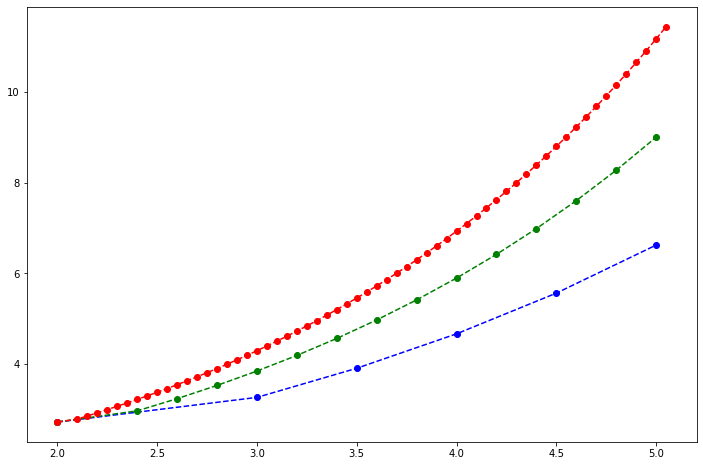

In [6]:
#Q1
# dy/dx = ylny/x ; y(2)=e=2.71828
import numpy as np
#(a)
def f(x,y):
    return (np.log(y))*y/x

xa,ya = forward_euler(2,5,0.5,f,y=2.71828)
xb,yb = forward_euler(2,5,0.2,f,y=2.71828)
xc,yc = forward_euler(2,5,0.05,f,y=2.71828)
plt.figure(figsize = (12, 8))
plt.plot(xa,ya,'bo--',label='h=0.5')
plt.plot(xb,yb,'go--',label='h=0.2')
plt.plot(xc,yc,'ro--',label='h=0.05')
plt.show()

In [7]:

# Predictor Corrector Method
import matplotlib.pyplot as plt

def predictor_corrector(func,h,x0,y0,xn):  
        X=[x0]
        Y=[y0]
        N=int(abs(x0-xn)/h)          #number of points to be plotted
        for i in range(N):
            x=X[-1]+h
            k1=h*func(X[-1],Y[-1])
            yp = Y[-1] + k1
            k2=h*func(x,yp)
            y_corr =Y[-1] +(k1+k2)/2                          
            X.append(x)
            Y.append(y_corr)
        return X,Y
func = lambda x,y: (y*math.log(y))/x





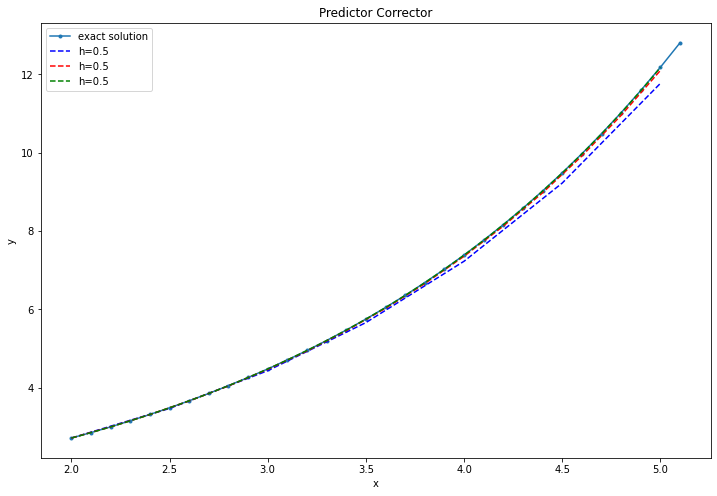

In [8]:
#(b)
def exact_soln(x,y,hs,lim):
    
    X=[x]
    Y=[y]
    while x<=lim:
        x+=hs
        y=math.exp(x/2) # exact Solution function
        X.append(x)
        Y.append(y)
    return X,Y

hs=0.1
lim=5


x=2
y=2.71828
X,Y=exact_soln(x,y,hs,lim)
plt.figure(figsize = (12, 8))
plt.plot(X,Y,'.-',label='exact solution')

xd = predictor_corrector(func,0.5,2,2.71828,5)
xe = predictor_corrector(func,0.2,2,2.71828,5)
xf = predictor_corrector(func,0.05,2,2.71828,5)

plt.plot(xd[0],xd[1],'b--',label='h=0.5')
plt.plot(xe[0],xe[1],'r--',label='h=0.5')
plt.plot(xf[0],xf[1],'g--',label='h=0.5')
plt.title('Predictor Corrector')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()